In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMG_SIZE=224
BATCH_SIZE=32


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_gene=train_datagen.flow_from_directory('/content/drive/MyDrive/defective/Leather Defect Classification',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')

Found 2880 images belonging to 6 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/defective/Leather Defect Classification',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='validation')

Found 720 images belonging to 6 classes.


In [ ]:
class_name=list(train_gene.class_indices.keys())
print(class_name)
print(train_gene.class_indices)

['Folding marks', 'Grain off', 'Growth marks', 'loose grains', 'non defective', 'pinhole']
{'Folding marks': 0, 'Grain off': 1, 'Growth marks': 2, 'loose grains': 3, 'non defective': 4, 'pinhole': 5}


In [ ]:
 model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(6, activation='softmax')
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,166 (91.20 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_gene,epochs=1,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 1033s 11s/step - accuracy: 0.3969 - loss: 1.8060 - val_accuracy: 0.6486 - val_loss: 1.1425


In [ ]:
 model.save('/content/drive/MyDrive/defective/def_mod.h5')

In [ ]:
 from tensorflow.keras.models import load_model
 from tensorflow.keras.preprocessing import image
 import matplotlib.pyplot as plt
 import numpy as np
 model=load_model("/content/drive/MyDrive/defective/def_mod.h5")
 print('Model Loaded')

Model Loaded


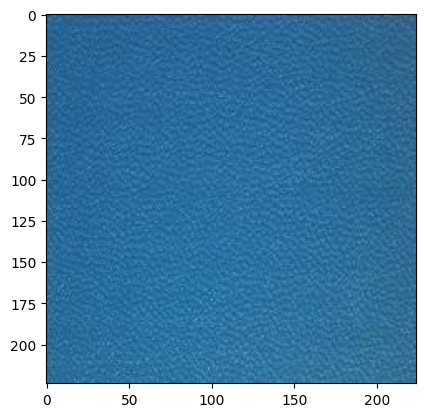

In [ ]:
 test_image_path="/content/drive/MyDrive/defective/Leather Defect Classification/non defective/Non defective 01 (10).jpg"
 img=image.load_img(test_image_path,target_size=(224,224))
 plt.imshow(img)
 plt.axis()
 plt.show()

In [ ]:
 img_array=image.img_to_array(img)
 img_array=np.expand_dims(img_array,axis=0)
 img_array /= 255.
 prediction = model.predict(img_array)
 ind=np.argmax(prediction)
 prediction=prediction[0][ind]
 inv_labels = {v: k for k, v in train_gene.class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [ ]:
predicted_class = inv_labels[ind]
print(" Predicted class:", predicted_class)

 Predicted class: non defective
